In [1]:
# execute to import notebook styling for tables and width etc.
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen('https://raw.githubusercontent.com/DataScienceUWL/DS775v2/master/ds755.css')
HTML(response.read().decode("utf-8"));

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import babel.numbers as numbers
from scipy.optimize import minimize_scalar

<font size=18>Lesson 08 Homework</font>

# Textbook Problem 20.2

The weather can be considered a stochastic system, because it evolves in a probabilistic manner from one day to the next. Suppose for a certain location that this probabilistic series satisfies the following description:

The probability of rain tomorrow is 0.6 if it is raining today. The probability of its being clear (no rain) tomorrow is 0.8 if it is clear today.

We've modified the problem a bit from the text book:  use uniformly distributed random numbers to simulate a sequence of 1000 days starting from a clear day.  Your code should output the the approximate probability of a rainy day based on your simulation results.

<font color = "blue"> *** 6 points -  answer in cell below *** (don't delete this cell) </font>

In [ ]:
def predict_forecast(days):
    np.random.seed(1)
    forecast = {}
    rain_today = 0

    for i in range(days):
        if i > 0:
            rain_today = np.random.randint(2, size=1)[0]

        if rain_today == 1:
            rain_tomorrow = 0.6

        elif rain_today == 0:
            rain_tomorrow = 1 - 0.8

        day = f"day {i+1}"
        forecast[day] = round(rain_tomorrow,2)

    prob_rain = round(np.mean(list(forecast.values())),2)*100
    print(f"Approximate probability of rain over {days} days: {prob_rain}%")
    return None


predict_forecast(1000)

# Textbook Problem 20.6-7

Now that Jennifer is in middle school, her parents have decided that they really must start saving for her college education. They have \\$10,000 to invest right now. Furthermore, they plan to save another $4,000 each year until Jennifer starts college five years from now. They plan to split their investment evenly between a stock fund and a bond fund. Historically, the stock fund has had an average annual return of 8 percent with a standard deviation of 6 percent. The bond fund has had an average annual return of 4 percent with a standard deviation of 3 percent. (Assume a normal distribution for both.)
Assume that the initial investment (\\$10,000) is made right now (year 0) and is split evenly between the two funds (i.e., \\$5,000 in each fund). The returns of each fund are allowed to accumulate (i.e., are reinvested) in the same fund and no redistribution will be done before Jennifer starts college. Furthermore, four additional investments of \\$4,000 will be made and split evenly between both funds (\\$2,000 each) at the end of year 1, year 2, year 3, and year 4, plus another \\$4,000 of savings will be available at the end of year 5, just in time for Jennifer to begin college. Use a 1000-trial simulation to estimate each of the following.

**(a)** What will be the expected value (mean) of the college fund
at the end of year 5?

**(b)** What will be the standard deviation of the college fund at the
end of year 5?

**(c)** What is the probability that the college fund at the end of year
5 will be at least \\$35,000?

**(d)** What is the probability that the college fund at the end of year
5 will be at least \\$40,000?

You can put all your code in one cell and print out the answers to (a)-(d) in a nicely formatted fashion please.  Your answers should be formatted as currency to the nearest $0.01.

<font color = "blue"> *** 12 points -  answer in cell below *** (don't delete this cell) </font>

In [ ]:
%matplotlib notebook

sim_size = 1000
college_fund = np.zeros(sim_size)

for i in range(sim_size):
    stock_fund, bond_fund = 5000, 5000
    
    for j in range(0,5):
        # stock/bond returns
        stock_returns = np.mean(np.random.normal(loc=8,scale=6,size=100))
        bond_returns = np.mean(np.random.normal(loc=4,scale=3,size=100))
        stock_i = (1 + (stock_returns/100))
        bond_i = (1 + (bond_returns/100))

        # increment funds
        stock_fund = (stock_fund * stock_i) + 2000
        bond_fund = (bond_fund * bond_i) + 2000
    
    college_fund[i] = stock_fund + bond_fund
    stock_fund, bond_fund = 0, 0
    
mean_fund = round(np.mean(college_fund),2)
std_fund = round(np.std(college_fund),2)
greater_than_35k = len(np.where(college_fund >= 35000)[0])/len(college_fund)
greater_than_40k = len(np.where(college_fund >= 40000)[0])/len(college_fund)

print(f"""mean of college fund: {mean_fund}
std of college fund: {std_fund}
prob greater than 35k: {greater_than_35k}
prob greater than 40k: {greater_than_40k}""")

# Textbook Problem 20.6-9

Road Pavers, Inc. (RPI) is considering bidding on a county road construction project. RPI has estimated that the cost of this particular project would be \\$5 million. In addition, the cost of putting together a bid is estimated to be \\$50,000. The county also will receive four other bids on the project from competitors of RPI. Past experience with these competitors suggests that each competitor’s bid is most likely to be 20 percent over the project cost of \\$5 million, but could be as low as 5 percent over or as much as 40 percent over this cost. Assume a triangular distribution for each of these bids.

**(a)** Suppose that RPI bids \\$5.7 million on the project. Perform 1,000 trials of a simulation. What is the probability that RPI will win the bid? What is RPI’s mean profit?

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [ ]:
num_competitors = 4
project_cost = 5000000 + 50000
rpi_bid = 5700000

possible_bids = np.arange(5.3,6,0.1)*1000000

def bid_sim(rpi_bid, sim_size = 1000, project_cost = 5050000, num_competitors = 4):
    lowest_bids = np.empty(sim_size)
    winners = np.empty(sim_size, dtype = np.object)
    competitor_bids = np.zeros(num_competitors)
    
    for i in range(sim_size):
        for j in range(num_competitors):
            competitor_bid_rate = np.random.triangular(2, 20, 40)
            competitor_bids[j] = project_cost * (1+(competitor_bid_rate/100))

        min_comp_bid = min(competitor_bids)
        lowest_bid = min(rpi_bid, min_comp_bid)

        if lowest_bid == rpi_bid:
            winners[i] = "rpi"
            lowest_bids[i] = rpi_bid
        else:
            winners[i] = np.argmin(competitor_bids)
            lowest_bids[i] = min_comp_bid

    rpi_winners = np.where(winners == 'rpi')[0]

    prob_rpi = len(rpi_winners)/len(winners)
    rpi_profit = rpi_bid - project_cost
    mean_profit = np.mean(lowest_bids) - project_cost
    profit_retainer = round(rpi_profit * prob_rpi,3)

    return prob_rpi, rpi_profit, profit_retainer

**(b)** Generate a parameter analysis report to consider eight possible bids between \\$5.3 million and $6 million in order to forecast RPI’s mean profit for each bid. Which of these bids maximizes RPI’s mean profit?

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [ ]:
possible_bids = np.arange(5.3,6,0.1)*1000000
mean_profit = np.zeros(len(possible_bids))
probabilities = np.zeros(len(possible_bids))
profit_retainer_ls = np.zeros(len(possible_bids))

for k, bid in enumerate(possible_bids):
    probabilities[k], mean_profit[k], profit_retainer_ls[k] = bid_sim(bid)

df = pd.DataFrame({
    'Bid': possible_bids,
    'RPI_Prob': probabilities,
    'RPI_Profit': mean_profit,
    'Profit_retainer': profit_retainer_ls
})
df

**(c)** Generate a trend chart for the eight bids considered in part (b).

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot('Bid','Profit_retainer',data=df, linestyle='-', marker='o');
ax.set_xticklabels([str(round(bid/1000)) + "k" for bid in df.iloc[:,0].tolist()])
ax.set_yticklabels([str(round(profit/1000)) + "k" for profit in df.iloc[:,3].tolist()])
plt.xlabel('Bid', fontsize=12);
plt.ylabel('Profit Retainer', fontsize=12);
plt.title("Trend Chart");

**(d)** Perform an automated search to find the bid that maximizes RPI’s mean profit. (Use one of the optimization tools we've studied.)

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [ ]:
# find maximum average profit
# results will vary slightly on each run

# to maximize we minimize the negative profit
def neg_mean_profit(bid):
    return(-bid_sim(bid)[2]) # simulate stats and return just mean

result = minimize_scalar(neg_mean_profit,bounds=[5050000,7000000],method='bounded')

# summarize results
print(f"Maximum mean profit is: ${numbers.format_decimal(round(-result['fun']))}")
print(f"And occurs at a bid of ${numbers.format_decimal(round(result['x']))}")

# Sausage Making - Simulation with Optimization

We're going to revisit the Sausage Factory problem from Lessons 1 and 2, but this time, we're going to introduce uncertainty.

In Lesson 2, we optimized the cost of our sausage making, by altering the ingredients in each sausage type to meet minimum requirements and fulfill a demand of 350 economy sausages and 500 premium sausages a week.

In reality, our demand fluctuates week to week. 

The basic set up of the problem is the same.

We're going to make sausages by blending pork, wheat, and starch.  Our objective is to minimize the cost of making the sausages.  The table below shows the ingredients available, the cost, and the amount of each ingredient available from our supplier:

Ingredient | Cost ($/kg) | Amount (kg)
-----------|------|--------------
Pork       | 4.32 | 7 kg
Wheat      | 2.46 | 20.0
Starch     | 1.86 | 17



We want to make 2 types of sausage:
* Economy ( > 40\% pork )
* Premium ( > 60\% pork )

Each sausage is 50 grams (0.05 kg).  

According to government regulations, the most starch we can use in our sausages is 25\% by weight.

**New Information:**

The price for pre-purchased pork is \$3.10, for a discount of 1.12 per kg. We will be fairly conservative in our estimates of pre-purchase, and we are setting our minimum pork used to our pre-purchased amount, so we will only need to calculate the total discount in our objective, not a penalty for buying overage.  

While our demand fluctuates, we know that our demand for economy sausages is between 325 and 375 each week and our demand for premium sausage is between 450 and 550 each week. Demand appears to be uniformly distributed (use `np.random.randint`).

***This is a prescriptive analytics problem!  You are prescribing the amount of pork to buy under contract to minimize future cost in an uncertain future.***

**(a)** Write a function that takes in the amount of discount pork we will pre-purchase as a variable (x). 

Inside the function, write a 1000 iteration loop that solves the optimization problem with random variables for demand and x as your stand in for the minimum amount of discount pork produced. Track the amount of full-price pork used and the cost of each iteration and return both from your function.  

You may base your Pyomo model on either the concrete or abstract formulations in Lesson 1 and Lesson 2 presentations, respectively.

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [3]:
### Imports ###

from pyomo.environ import *
import pandas as pd # used for results display

def supply_optimizer(discount_pork):
    # Unfold to see the Pyomo solution with arrays of decision variables
    ### Problem Data ###

    types = ['economy','premium']
    ingredients = ['pork', 'wheat', 'starch']

    cost = dict( zip( ingredients, [4.32, 2.46, 1.86] ) )

    kg_per_sausage = 0.05

    mnpi = [[.4,.6],[0,0],[0,0]]
    min_prop_ing = { ingredients[i]:{ types[j]:mnpi[i][j] for j in range(len(types)) } for i in range(len(ingredients)) }
    mxpi = [[1,1],[1,1],[.25,.25]]
    max_prop_ing = { ingredients[i]:{ types[j]:mxpi[i][j] for j in range(len(types)) } for i in range(len(ingredients)) }

    max_ingredient = dict( zip( ingredients, [discount_pork+7, 20, 17] ) )
    min_ingredient = dict( zip( ingredients, [discount_pork,  0,  0] ) )

    output = []

    for _ in range(1000):
        number_each_type = dict( zip( types, [np.random.randint(325,375), np.random.randint(450,550)] ) )
        ### Pyomo Model ###

        # Concrete Model
        M = ConcreteModel(name = "Sausages")

        # Decision Variables
        M.amount = Var(ingredients, types, domain = NonNegativeReals)

        # Objective
        M.cost = Objective( expr = sum( cost[i] * sum(M.amount[i,t] for t in types) 
                                       for i in ingredients) - 1.22*discount_pork, 
                           sense = minimize )

        M.tot_sausages_ct = ConstraintList()
        for t in types:
            M.tot_sausages_ct.add( sum( M.amount[i,t] for i in ingredients ) 
                                 == kg_per_sausage * number_each_type[t] )

        M.min_prop_ct = ConstraintList()
        for i in ingredients:
            for t in types:
                M.min_prop_ct.add( M.amount[i,t] >= min_prop_ing[i][t] *
                                 sum( M.amount[k,t] for k in ingredients ) )

        M.max_prop_ct = ConstraintList()
        for i in ingredients:
            for t in types:
                M.max_prop_ct.add( M.amount[i,t] <= max_prop_ing[i][t] * 
                                 sum( M.amount[k, t] for k in ingredients ) )
                
        M.max_ingredient_ct = ConstraintList()
        for i in ingredients:
            M.max_ingredient_ct.add( sum( M.amount[ i, t] for t in types ) <= 
                                   max_ingredient[i] )
            
        M.min_ingredient_ct = ConstraintList()
        for i in ingredients:
            M.min_ingredient_ct.add( sum( M.amount[ i, t] for t in types ) >=
                                   min_ingredient[i] )

        ### Solution ###
        solver = SolverFactory('glpk')
        solver.solve(M)

        dvars = pd.DataFrame( [ [M.amount[i,t]() for t in types] for i in ingredients ],
                            index = ['Pork','Wheat','Starch'],
                            columns = ['Economy','Premium'])

        full_price_pork = sum(dvars.loc['Pork']) - discount_pork
        output.append(tuple((round(M.cost(),2), round(full_price_pork,2))))
    return output

**(b)** Test your function, using 20 as your value of x. Plot histograms of the Kilograms of Full-Price Pork purchased and the cost.

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [4]:
output = supply_optimizer(20)
cost, full_price_pork = zip(*output)

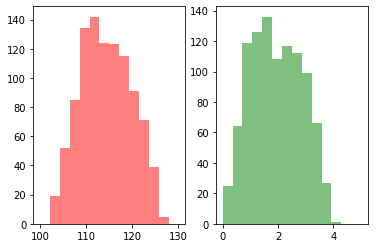

In [7]:
bins_cost = np.linspace(100, 130, 15)
bins_fpp = np.linspace(0, 5, 15)

fig, ax = plt.subplots(1,2)
ax[0].hist(cost, bins_cost, alpha = 0.5, color = 'r')
ax[1].hist(full_price_pork, bins_fpp, alpha = 0.5, color = 'g')
plt.show()

Notice that the final cost and the amount of full-price pork purchased have distributions that fairly closely match each other. That's because full-price pork is the most expensive component of our sausages. The more full-price pork we use, the more expensive our product is. We'd like to optimize the amount of full-price pork we use.

**(c)** Write a loop to call your function for all the values of pre-order quantities between and including 17 and 28.

Store the values of:

* pre-order quantities
* the mean, 5th percentile and 95th percentile of the overage
* the mean, 5th percentile and 95th percentile of the cost.

After your loop, print the values in a dataframe.

*Note: This may take a while to run.*

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

**(d)** Using the Freddie the Newsboy Simulation code, plot a trend chart that shows the overage by order quantity. 

Using the trend chart and the output from your dataframe, write a short summary explaining how much pre-purchased discount pork we should buy each week and why.

<font color = "blue"> *** 4 points -  answer in cells below *** (don't delete this cell) </font>